In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_h5ad
from scipy.stats import pearsonr, norm, ttest_ind, fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns

/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, dpi_save=600, )

scanpy==1.6.0 anndata==0.7.5 umap==0.3.10 numpy==1.17.4 scipy==1.5.0 pandas==1.1.4 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.8.2 louvain==0.6.1


In [4]:
mars_adult = read_h5ad('/data/Figure5/mars_adult_clust_reads_batch_type.h5ad')

In [5]:
mars_adult

AnnData object with n_obs × n_vars = 1819 × 335
    obs: 'MARS', 'known_types', 'Obp19d', 'Obp56d', 'Obp83a', 'seq_batch', 'seq_depth', 'HDBSCAN_attempt', 'Or85c', '5-HT1A', '5-HT2B', 'Type', 'annotated'
    uns: 'MARS_colors', 'neighbors', 'pca', 'seq_batch_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
mars_adult.obs.annotated.cat.categories

Index(['DA1', 'DC1', 'DL3', 'VA1d', 'VA1v', 'DM1', 'DM2', 'DM4', 'V', 'VA2',
       'D', 'DC2', 'DL5', 'VA6_DC3_DM3', 'VM3_VA5', 'VL1_VM1',
       'DL2d/v_DP1l_VC3l', 'DP1m_DC4', 'VP1l_VP3', 'VP4_VP1d_VP2',
       'unannotated'],
      dtype='object')

In [7]:
mars_adult.obs.annotated.cat.reorder_categories(['D','DA1', 'DC1','DC2','DL2d/v_DP1l_VC3l', 'DL3','DL5', 'DP1m_DC4', 'DM1', 'DM2', 'DM4', 
                                                 'V','VA1d', 'VA1v', 'VA2','VA6_DC3_DM3','VL1_VM1','VM3_VA5', 'VP1l_VP3', 'VP4_VP1d_VP2','unannotated'], inplace=True)

In [10]:
#cluster colors in manuscript

mars_adult.uns['annotated_colors'][0]='#ADFF2F'
mars_adult.uns['annotated_colors'][1]='#FFCA76'
mars_adult.uns['annotated_colors'][2]='#EE7600'
mars_adult.uns['annotated_colors'][3]='#990099'
mars_adult.uns['annotated_colors'][4]='#D02090'
mars_adult.uns['annotated_colors'][5]='#147226'
mars_adult.uns['annotated_colors'][6]='#CD0000'
mars_adult.uns['annotated_colors'][7]='#BF5FFF'
mars_adult.uns['annotated_colors'][8]='#37FDFC'
mars_adult.uns['annotated_colors'][9]='#EE00EE'
mars_adult.uns['annotated_colors'][10]='#FFFF00'
mars_adult.uns['annotated_colors'][11]='#00FA9A'
mars_adult.uns['annotated_colors'][12]='#EAADEA'
mars_adult.uns['annotated_colors'][13]='#C96880'
mars_adult.uns['annotated_colors'][14]='#0AC92B'
mars_adult.uns['annotated_colors'][15]='#A020F0'
mars_adult.uns['annotated_colors'][16]='#0068FF'
mars_adult.uns['annotated_colors'][17]='#36DBCA'
mars_adult.uns['annotated_colors'][18]='#9A85E4'
mars_adult.uns['annotated_colors'][19]='#d5e807'
mars_adult.uns['annotated_colors'][20]='#EAEAEA'

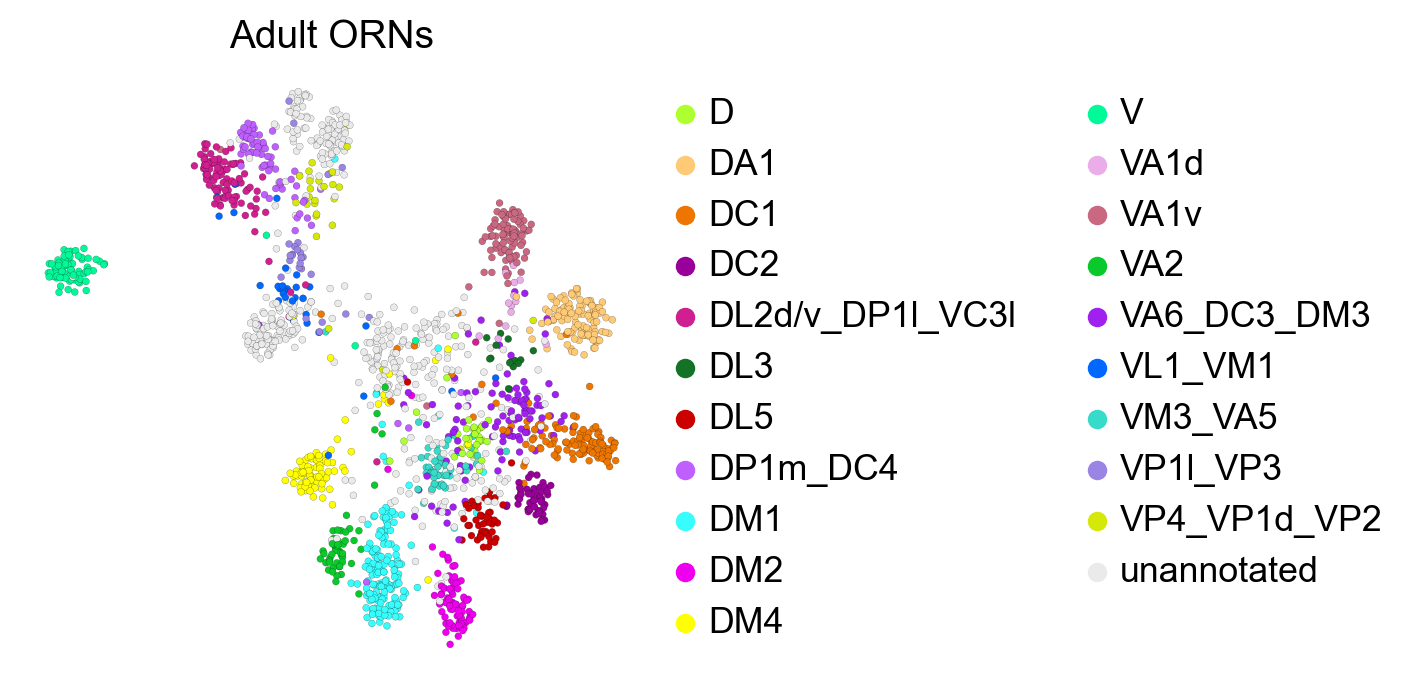

In [11]:
sc.pl.umap(mars_adult, title='Adult ORNs', color='annotated', size=25, frameon=False, edgecolor='k',
           linewidths=0.06) #legend_loc='on data')

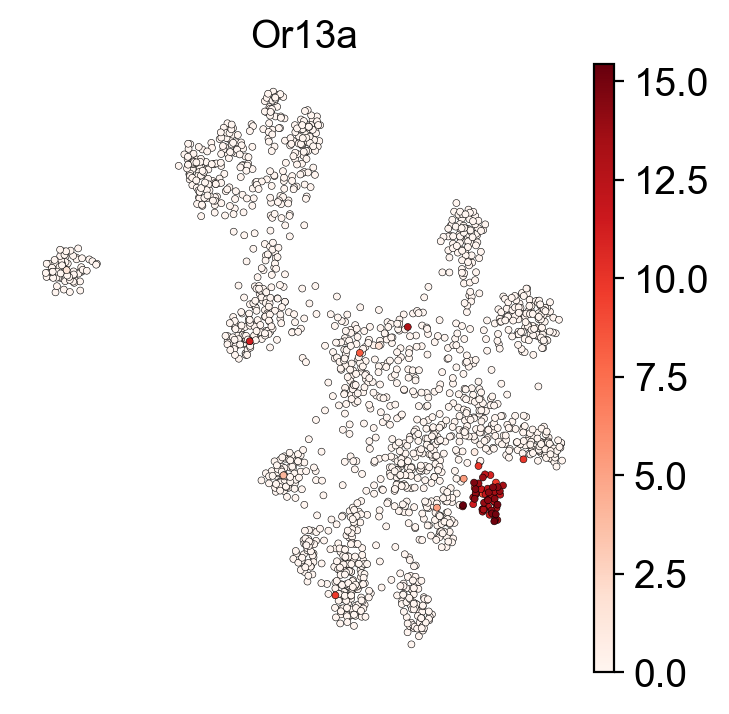

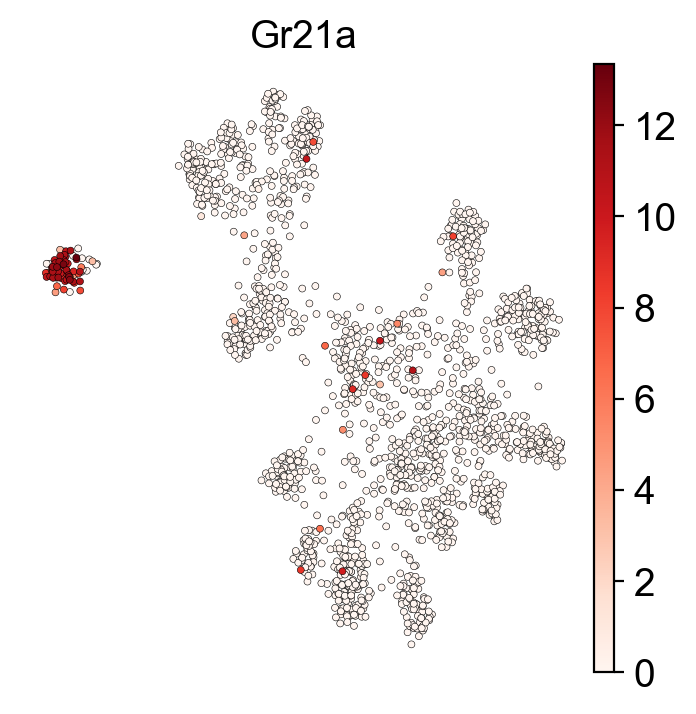

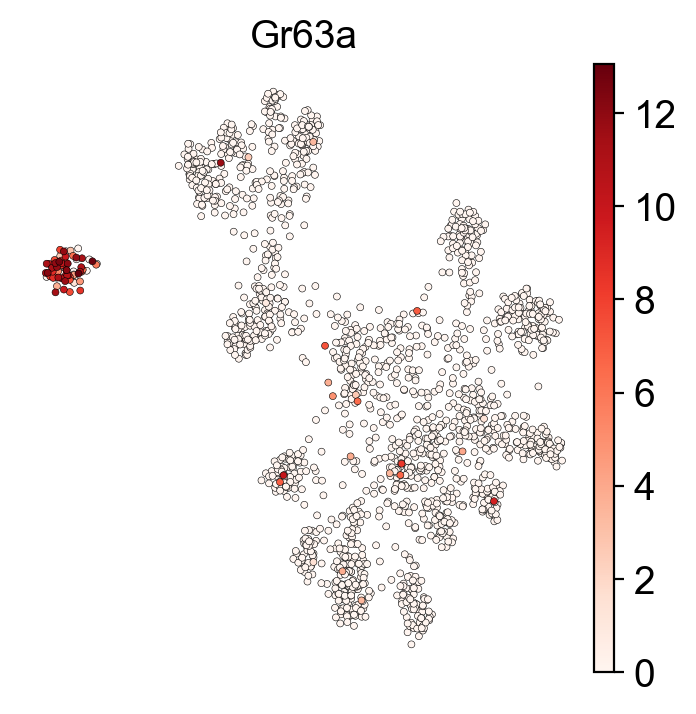

In [12]:
myGene = ['Or13a', 'Gr21a', 'Gr63a']

for gene in myGene:
    sc.pl.umap(mars_adult, color=[gene], size=25,edgecolors='k', color_map='Reds',edgecolor='k',
           linewidths=0.2, frameon=False,) 

In [13]:
mars_adult_anno = mars_adult[(mars_adult.obs.annotated != 'unannotated')]

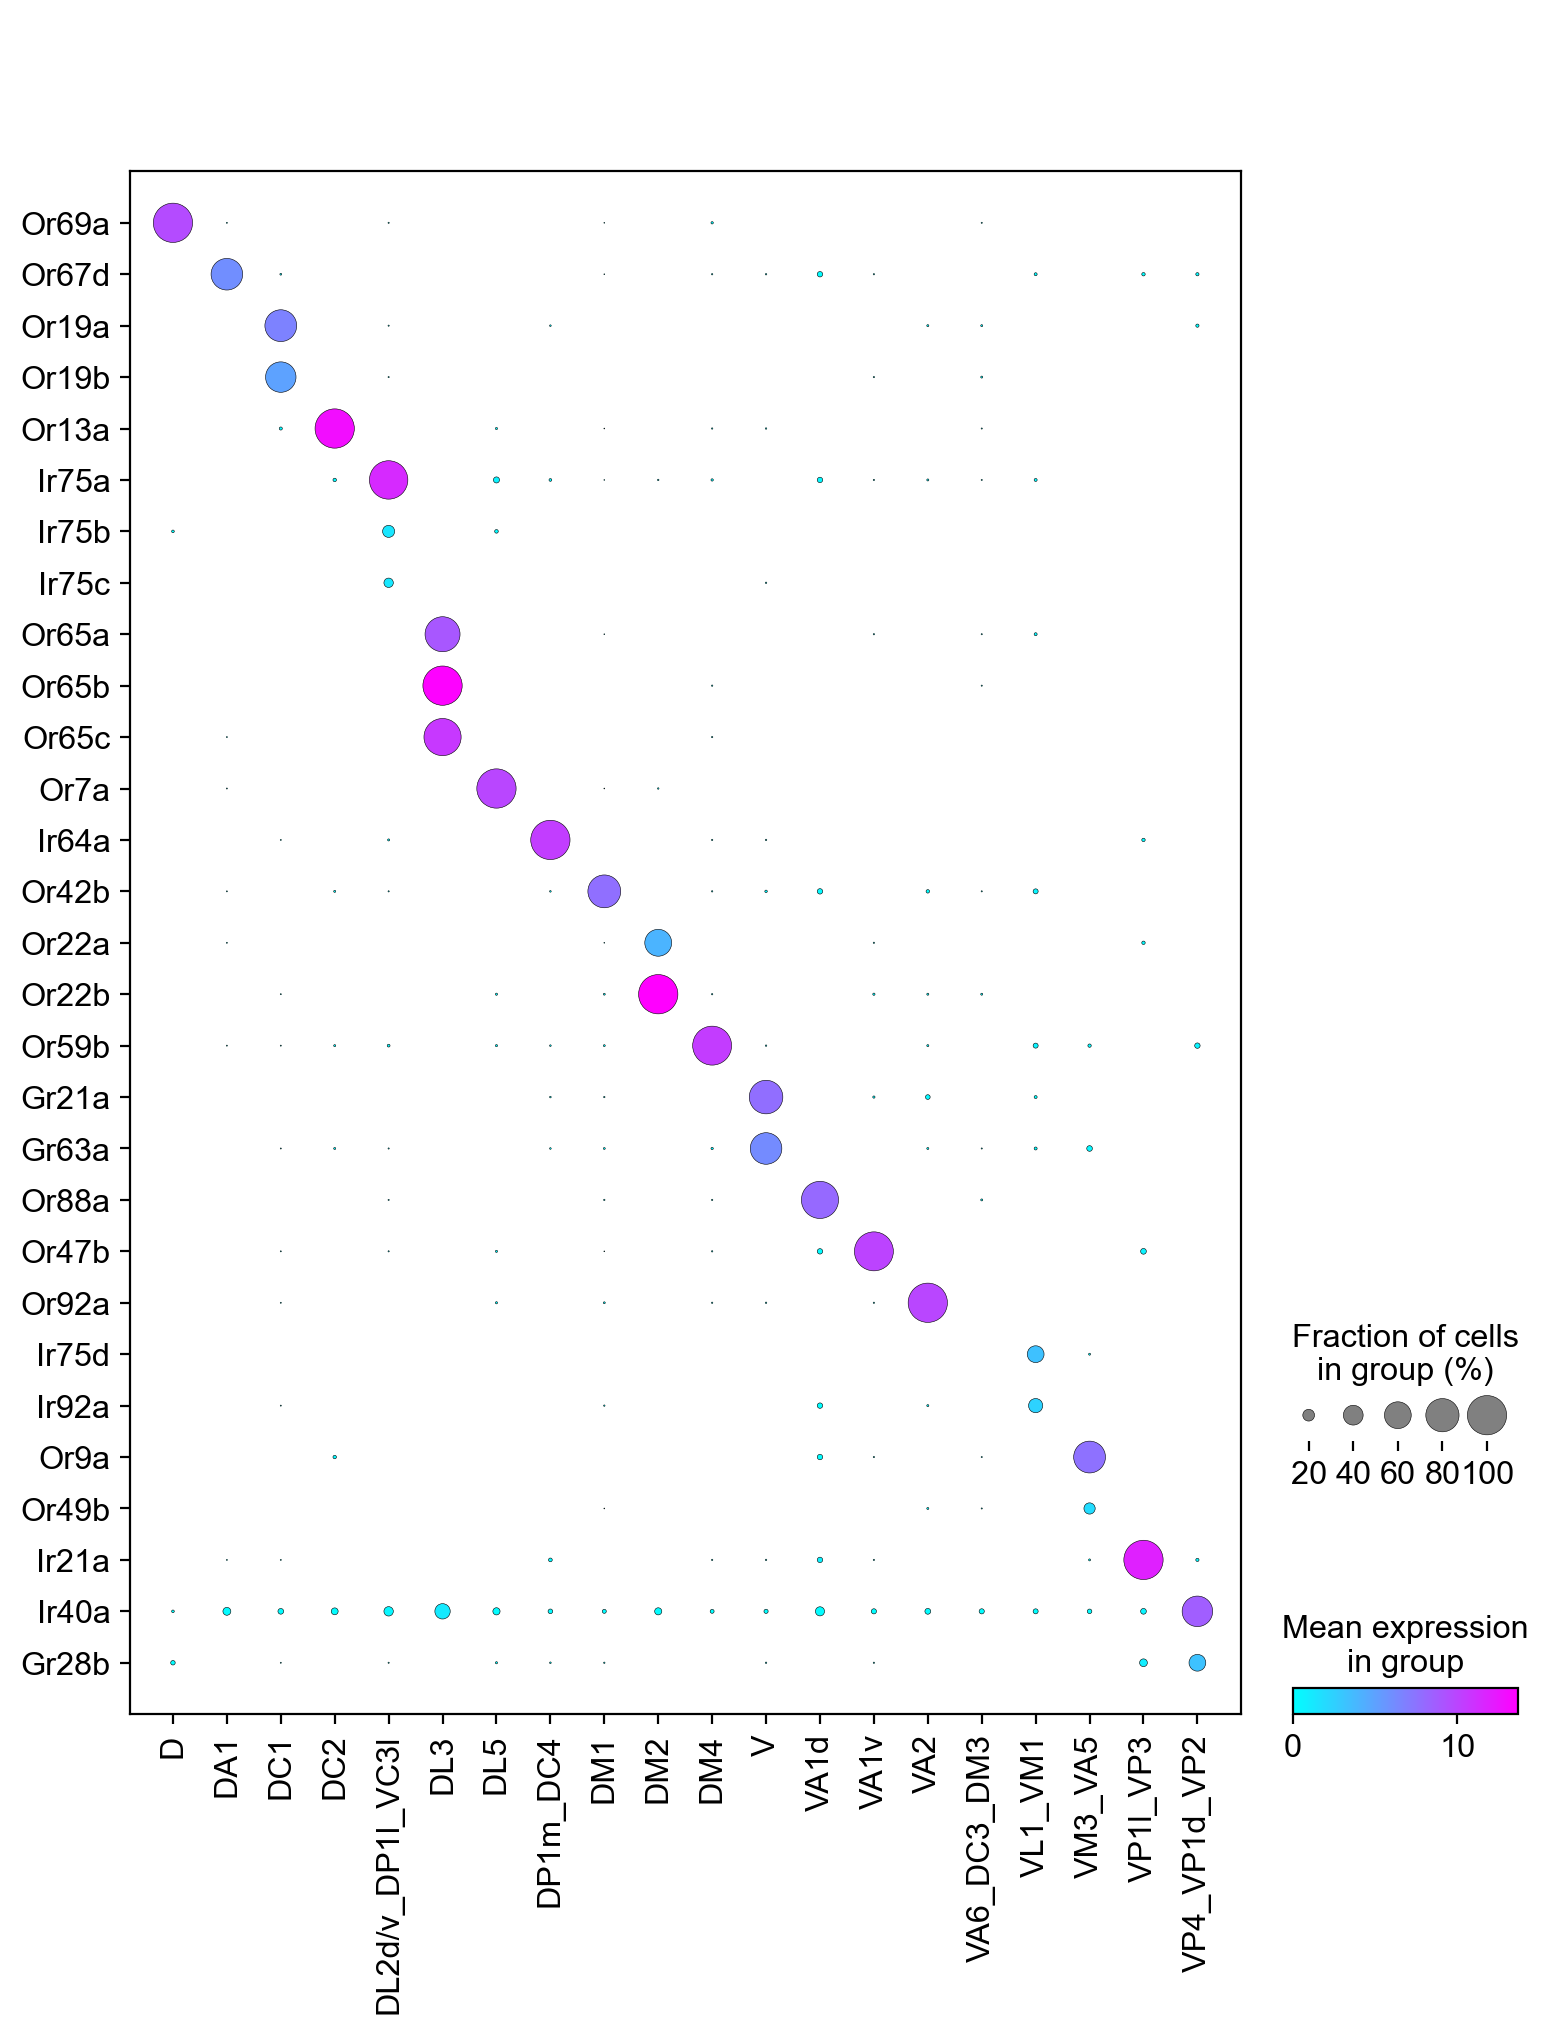

In [14]:
marker_genes = ['Or69a','Or67d','Or19a', 'Or19b','Or13a','Ir75a','Ir75b', 'Ir75c','Or65a', 
                'Or65b', 'Or65c','Or7a','Ir64a','Or42b','Or22a', 'Or22b','Or59b','Gr21a','Gr63a',
                'Or88a', 'Or47b','Or92a', 'Ir75d', 'Ir92a','Or9a','Or49b','Ir21a', 'Ir40a', 'Gr28b']
                
sc.pl.dotplot(mars_adult_anno, marker_genes, groupby='annotated', color_map='cool',swap_axes= True)

